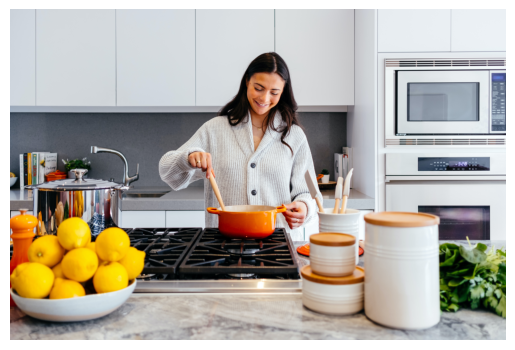

[203 210 218]


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = 'kitchen.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # відключити осі
plt.show()

print(img[0][0])

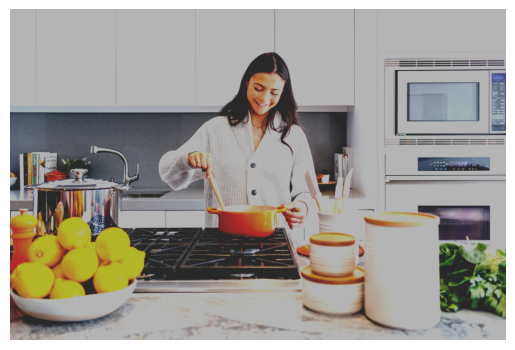

In [7]:
import numpy as np

clipped_img = np.clip(img, 40, 180)

plt.imshow(clipped_img, cmap='gray' if len(clipped_img.shape) == 2 else None)
plt.axis('off')
plt.show()


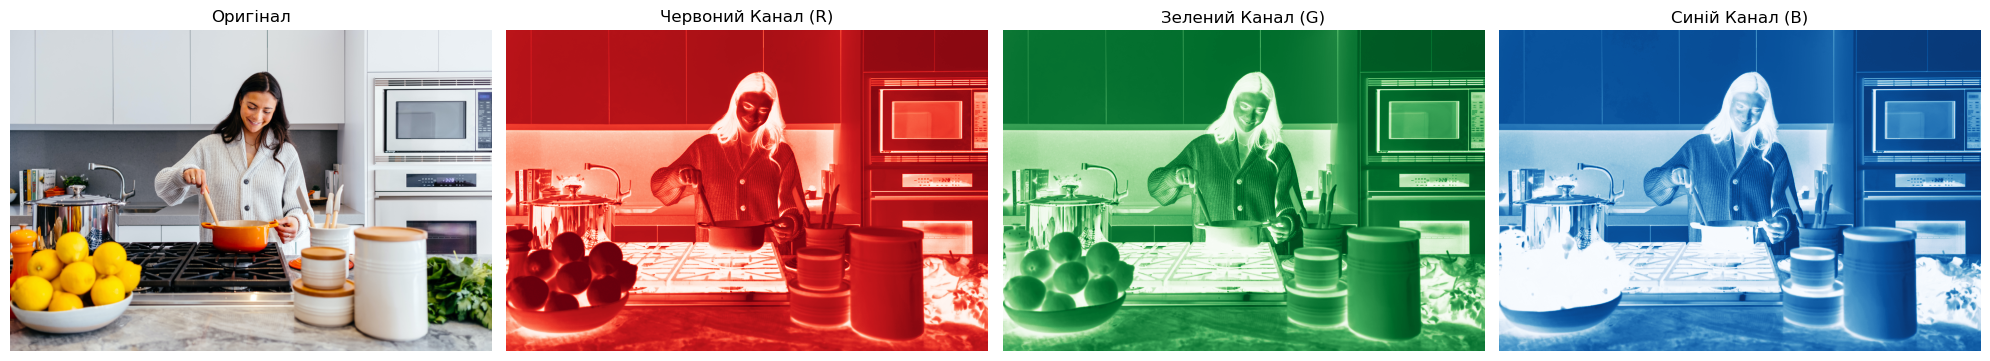

In [8]:
# Виокремлення окремих каналів
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

# Відображення оригінального зображення та його каналів
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(img)
axs[0].set_title('Оригінал')
axs[0].axis('off')

axs[1].imshow(R, cmap='Reds')
axs[1].set_title('Червоний Канал (R)')
axs[1].axis('off')

axs[2].imshow(G, cmap='Greens')
axs[2].set_title('Зелений Канал (G)')
axs[2].axis('off')

axs[3].imshow(B, cmap='Blues')
axs[3].set_title('Синій Канал (B)')
axs[3].axis('off')

plt.tight_layout()
plt.show()


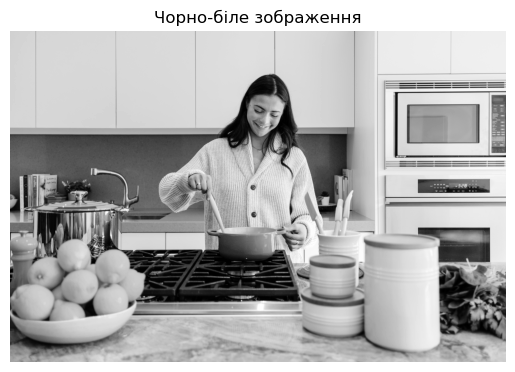

In [9]:
# Трансформація зображення в чорно-біле
grayscale_img = 0.299 * R + 0.587 * G + 0.114 * B
grayscale_img = grayscale_img.astype(np.uint8)

# Відображення чорно-білого зображення
plt.imshow(grayscale_img, cmap='gray')
plt.title('Чорно-біле зображення')
plt.axis('off')
plt.show()

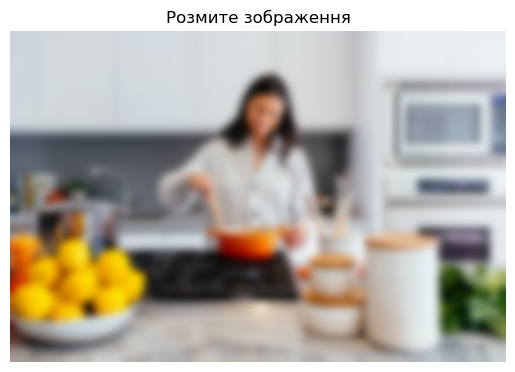

In [10]:
from scipy.ndimage import gaussian_filter
def blur_color_image(image, sigma=50):
    # Застосування гауссівського розмиття для кожного каналу окремо
    blurred_r = gaussian_filter(image[:,:,0], sigma=sigma)
    blurred_g = gaussian_filter(image[:,:,1], sigma=sigma)
    blurred_b = gaussian_filter(image[:,:,2], sigma=sigma)
    
    # Об'єднання розмитих каналів назад в одне зображення
    blurred_image = np.stack([blurred_r, blurred_g, blurred_b], axis=2)
    return blurred_image

blurred_img = blur_color_image(img)

# Відображення розмитого кольорового зображення
plt.imshow(blurred_img)
plt.title('Розмите зображення')
plt.axis('off')
plt.show()


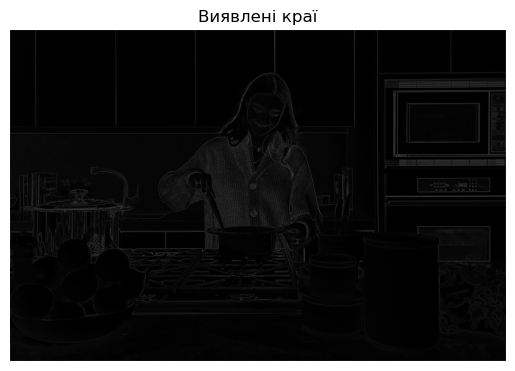

In [11]:
from scipy.ndimage import sobel

def detect_edges(image):
    # Конвертуємо зображення в сірі тони для спрощення обчислень
    gray = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

    # Застосовуємо фільтр Собеля по осі x і y
    dx = sobel(gray, axis=0, mode='constant')
    dy = sobel(gray, axis=1, mode='constant')
    
    # Об'єднуємо результати для отримання величини градієнта
    magnitude = np.hypot(dx, dy)
    magnitude *= 255.0 / np.max(magnitude)
    
    return magnitude

edges_img = detect_edges(img)

# Відображення результатів
plt.imshow(edges_img, cmap='gray')
plt.title('Виявлені краї')
plt.axis('off')
plt.show()